In [326]:
import serial

In [341]:
ser = serial.Serial('COM3', 115200, timeout=10)
ser

Serial<id=0x1435c198470, open=True>(port='COM3', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=10, xonxoff=False, rtscts=False, dsrdtr=False)

In [343]:
def get():
    while True:
        ser.flush()
        data = ser.readline().decode("ascii").replace("\x00", "")[:-1].split('|')
        print(len(data))
        if len(data) == 200:
            return data
            break

In [365]:
import numpy as np
ser.reset_input_buffer()
data = list((np.int_(get())*3.3)/4096.0)

206
208
202
200


In [366]:
import scipy
import matplotlib.pyplot as plt

def fft_plot(data, sampling_rate):
    n = len(data)
    T = 1/sampling_rate
    yf = scipy.fft(data)
    xf = np.linspace(0.0, 1.0/(2.0*T), n/2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    return plt.show()

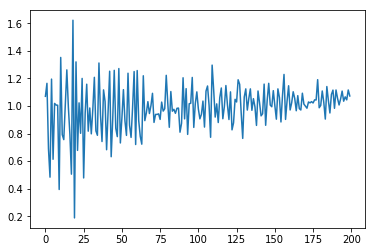

In [367]:
plt.plot(data)

C:\Users\Railway\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


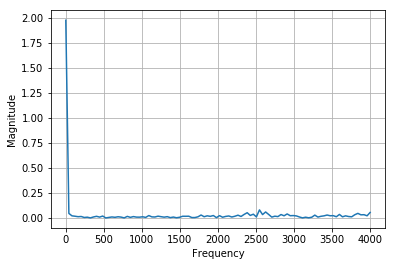

In [368]:
fft_plot(data, 8000)

In [339]:
ser.close()